In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("Darbhanga.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,WS2M,T2M,RH2M,PRECTOTCORR,WD50M,WS10M_RANGE,PS
0,2011,1,1,2.27,16.72,69.88,1.39,226.94,5.25,100.48
1,2011,1,2,2.05,13.75,58.38,0.00,286.38,2.44,100.69
2,2011,1,3,1.44,13.37,59.62,0.00,304.88,1.92,100.94
3,2011,1,4,2.03,12.09,60.00,0.00,292.31,2.22,100.92
4,2011,1,5,1.85,11.75,64.81,0.00,286.94,1.70,100.78
...,...,...,...,...,...,...,...,...,...,...
3738,2021,3,27,1.96,28.35,17.38,0.00,277.00,3.11,100.20
3739,2021,3,28,1.59,30.44,16.25,0.00,258.19,2.51,100.02
3740,2021,3,29,1.53,31.23,17.19,0.00,178.56,3.66,99.80
3741,2021,3,30,2.02,31.40,19.31,0.04,245.12,7.27,99.29


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 10
Discrete feature Count 3
Continuous feature Count 7
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
WS2M           0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
WD50M          0.0
WS10M_RANGE    0.0
PS             0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'WS2M', 'T2M', 'RH2M', 'PRECTOTCORR', 'WD50M', 'WS10M_RANGE', 'PS']


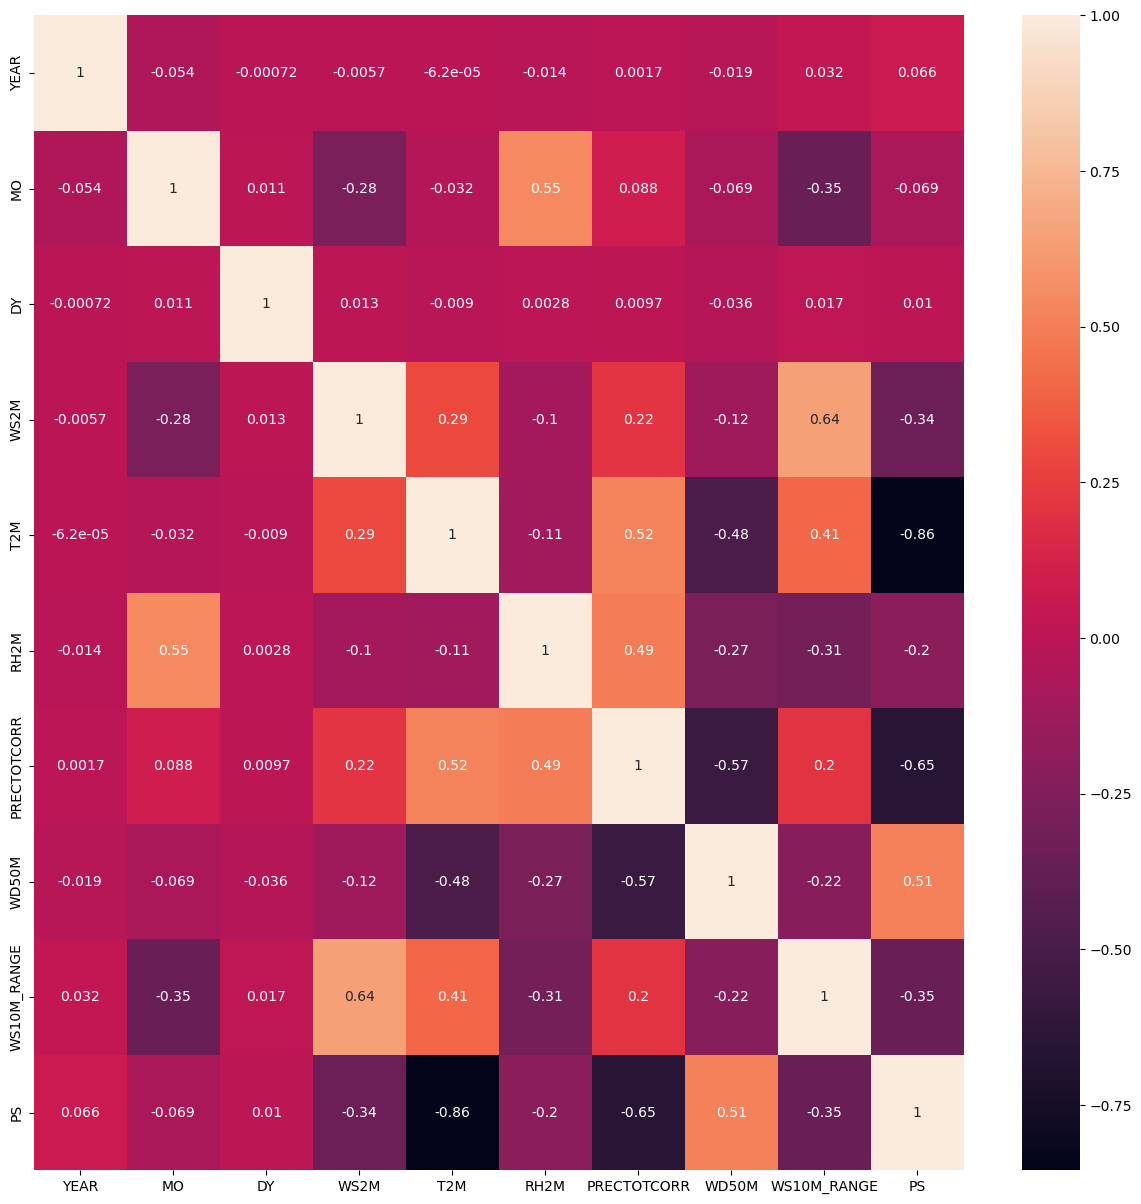

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

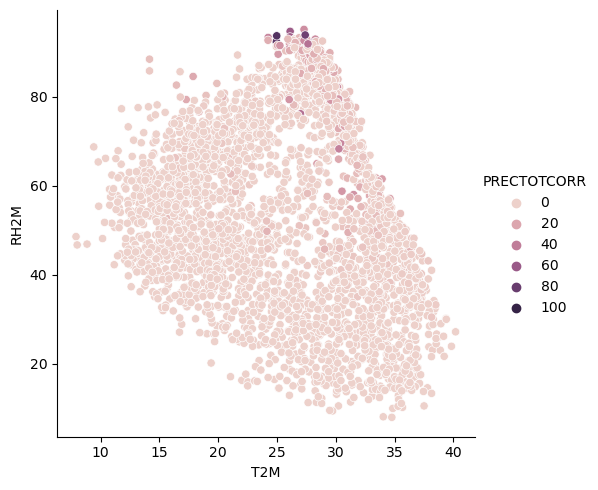

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


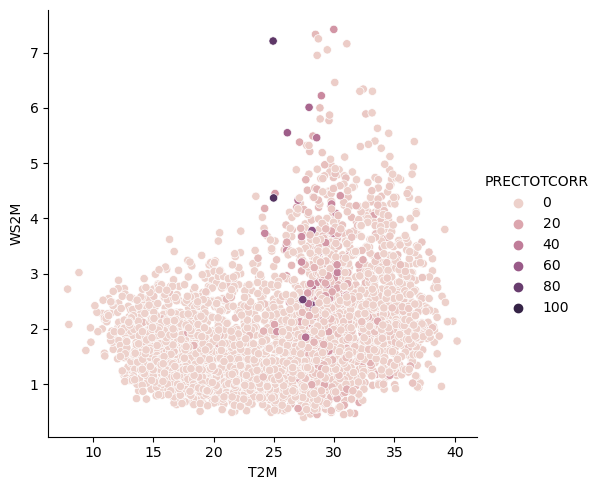

In [9]:
sns.relplot(x='T2M',y='WS2M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


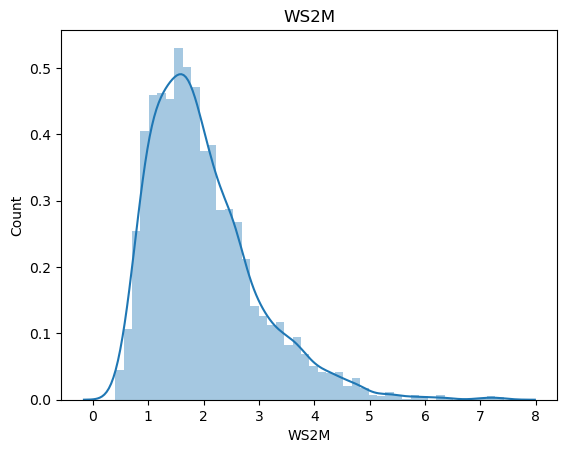

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


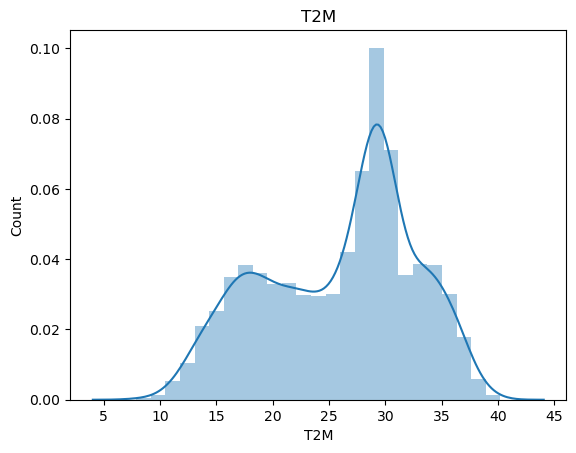

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


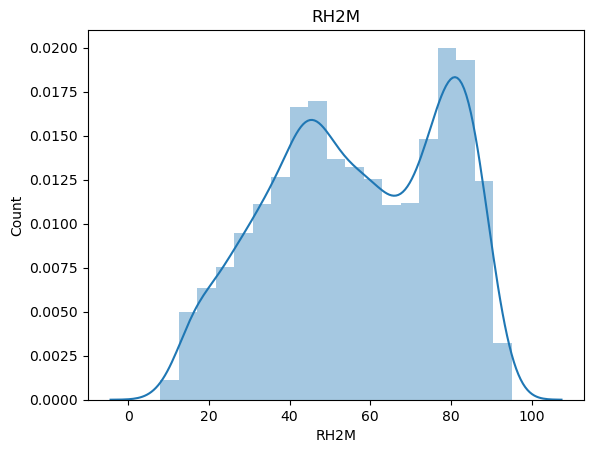

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


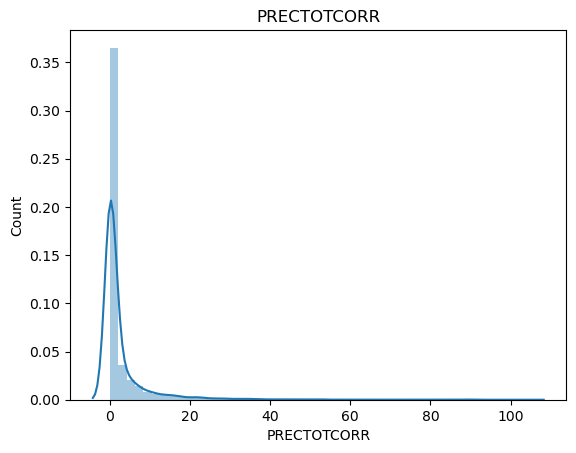

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


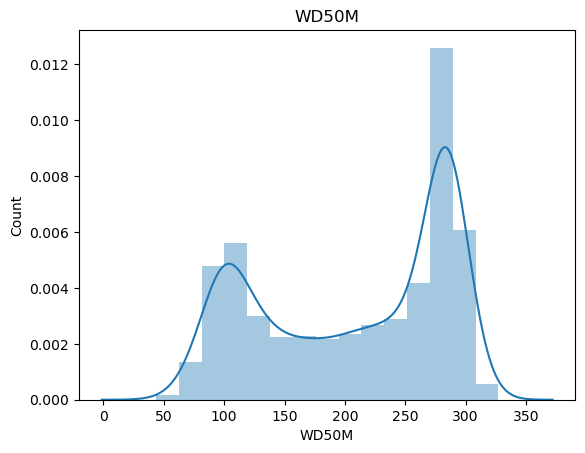

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


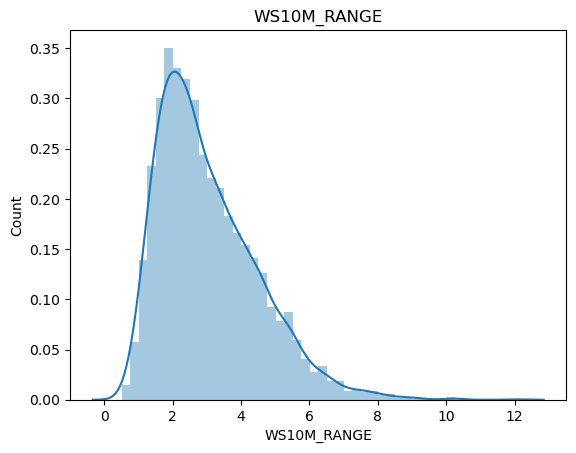

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


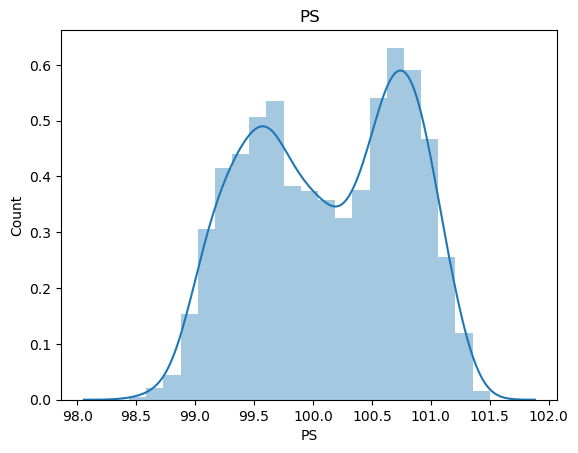

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

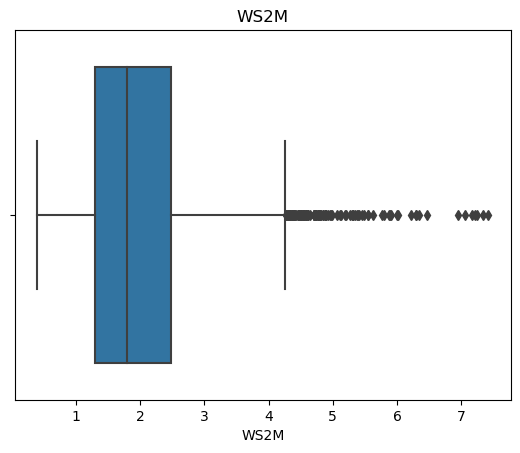

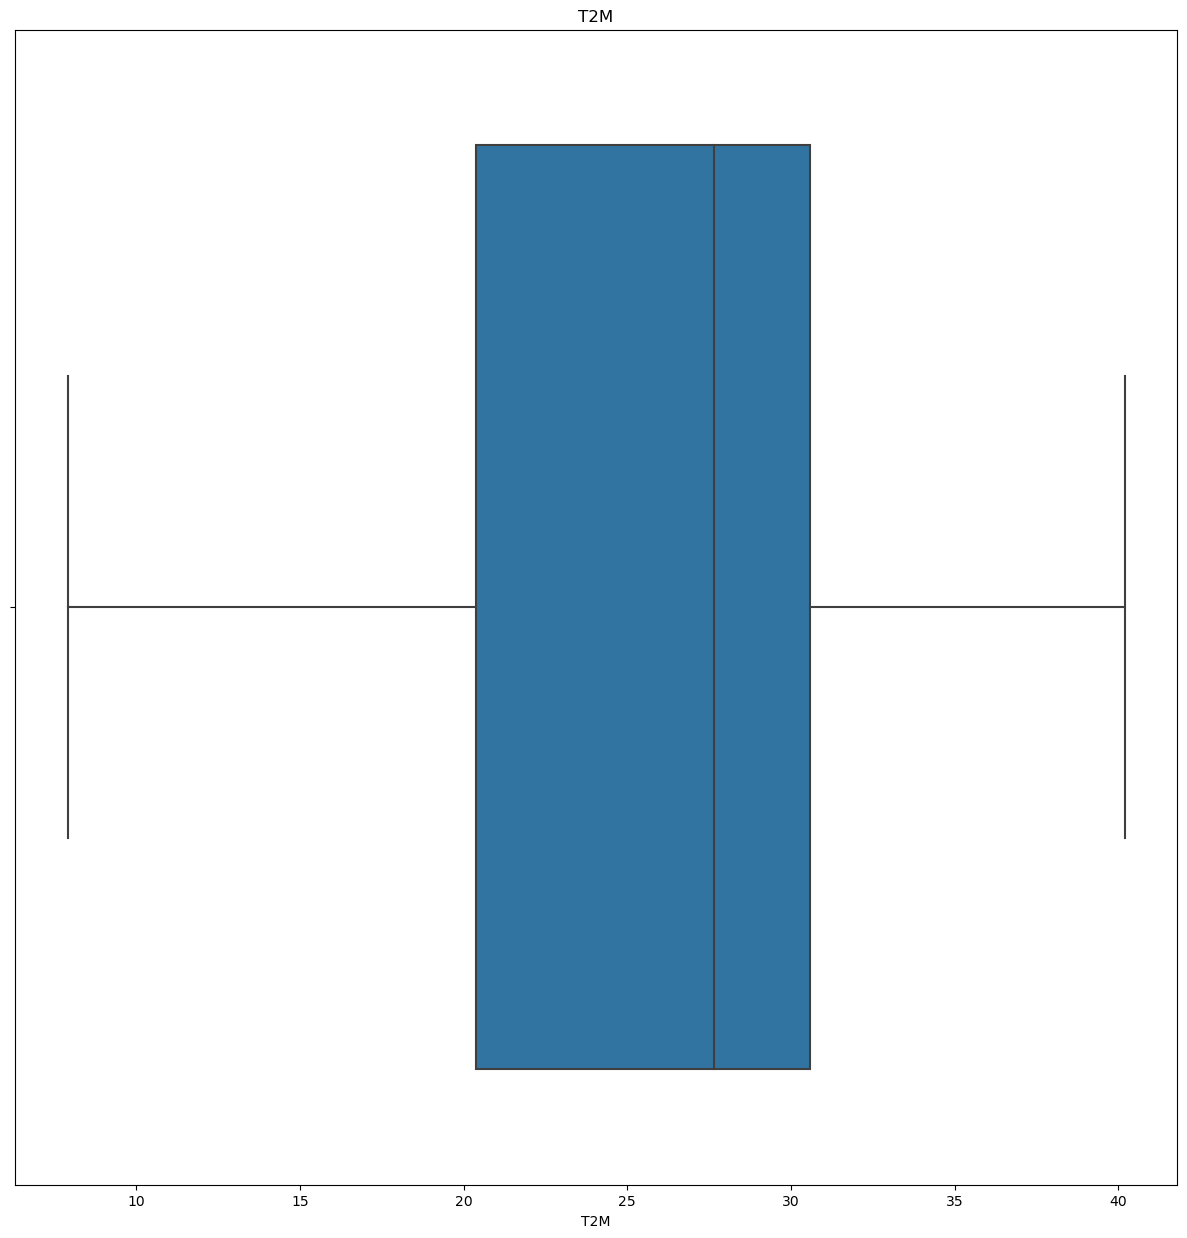

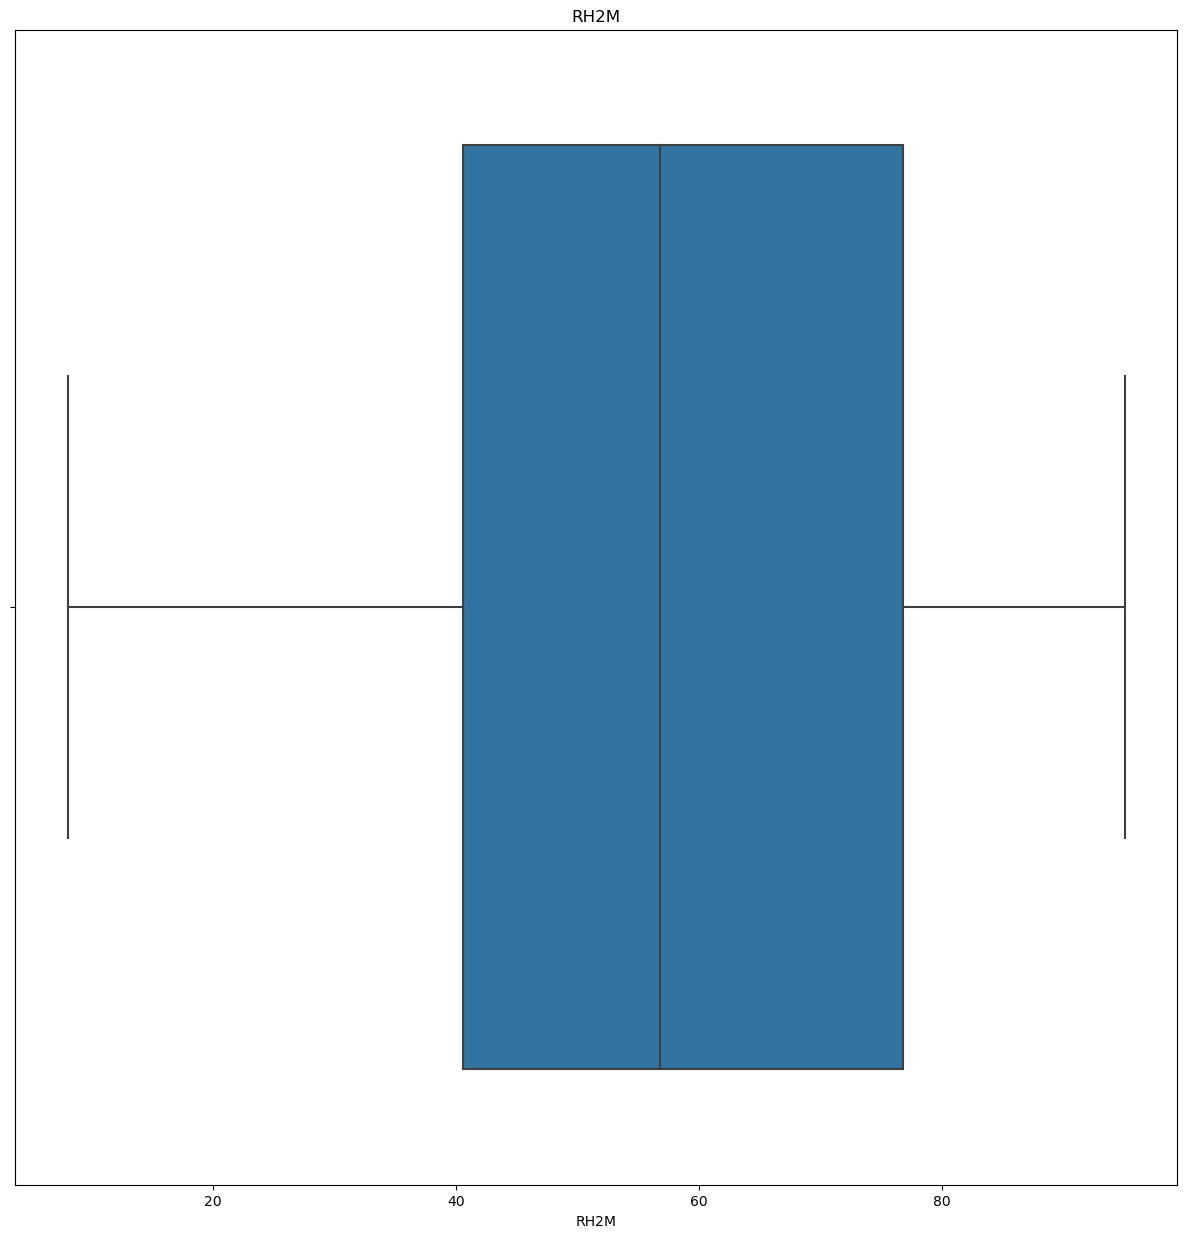

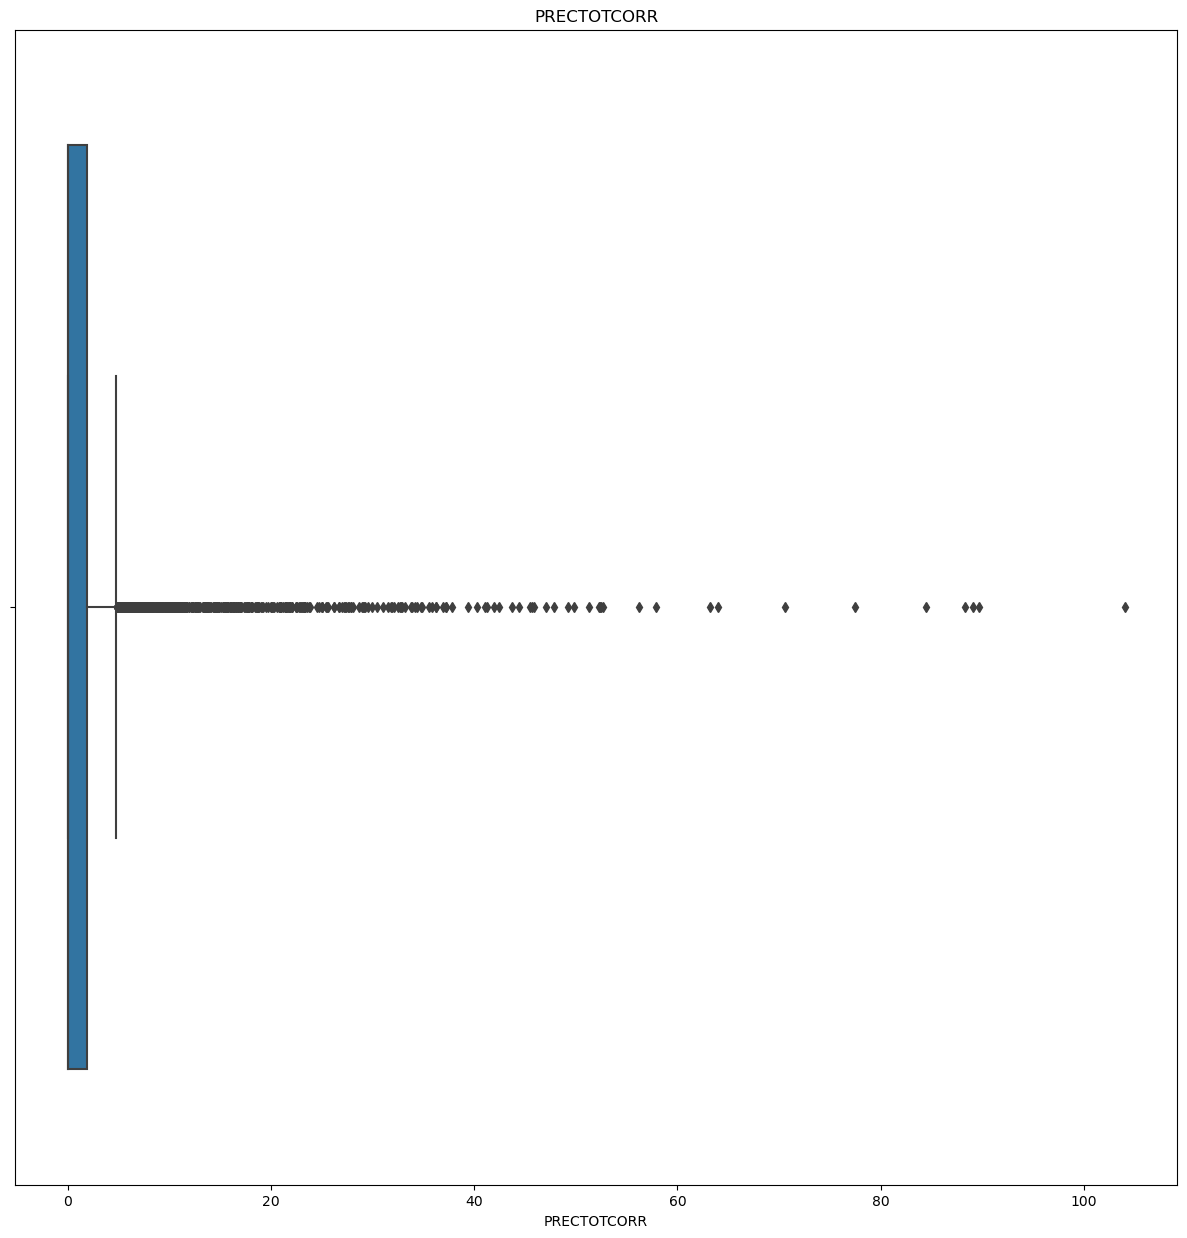

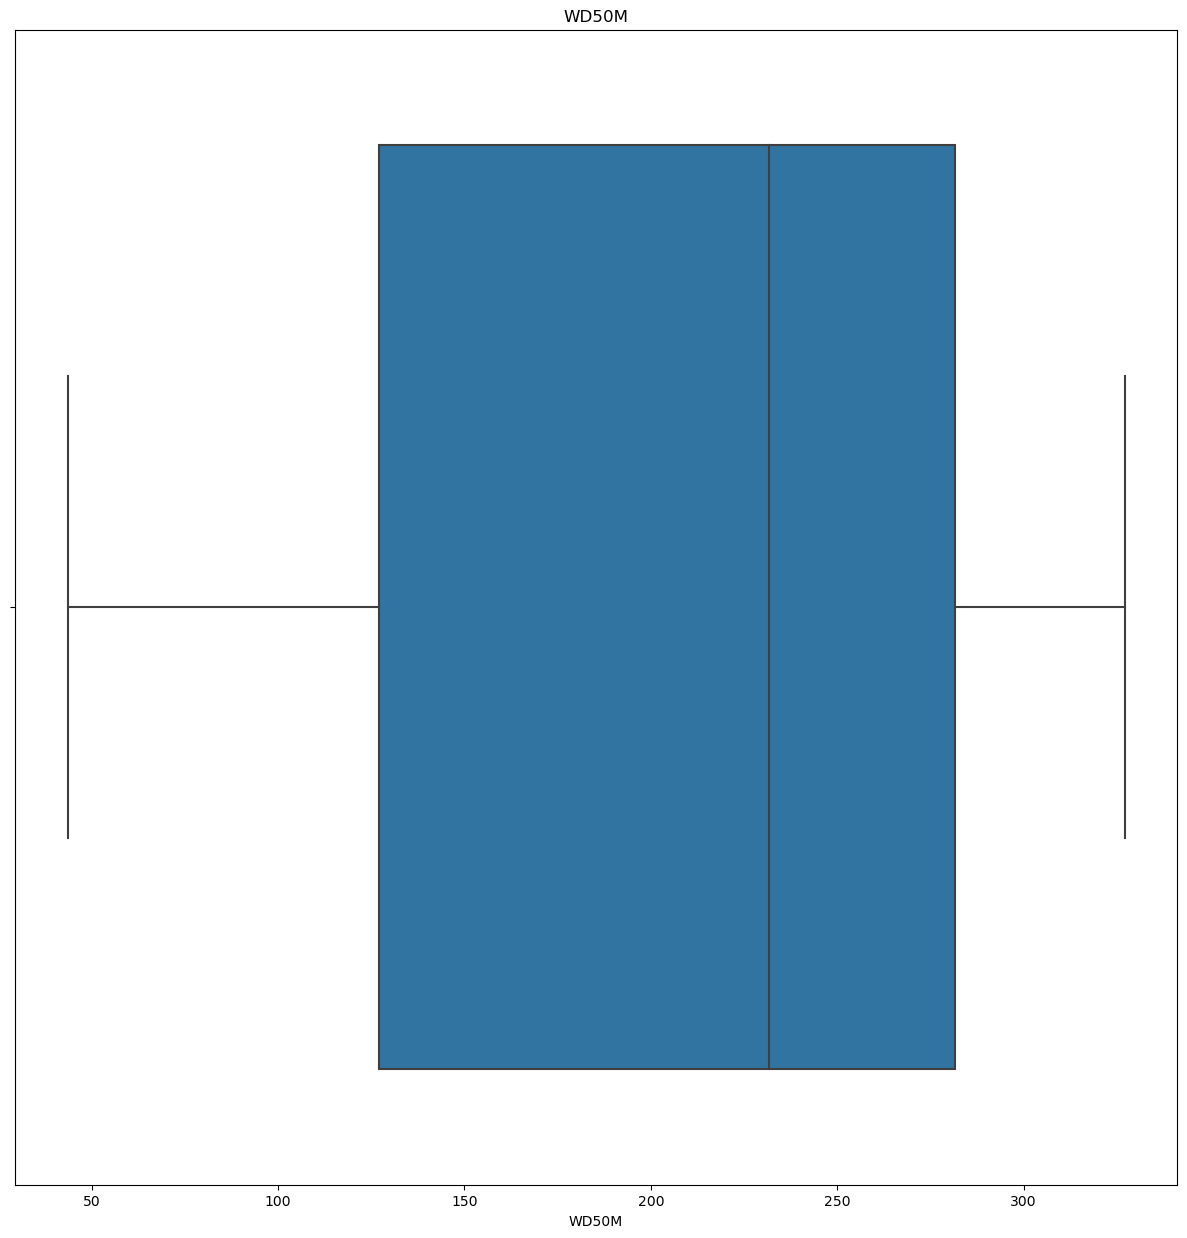

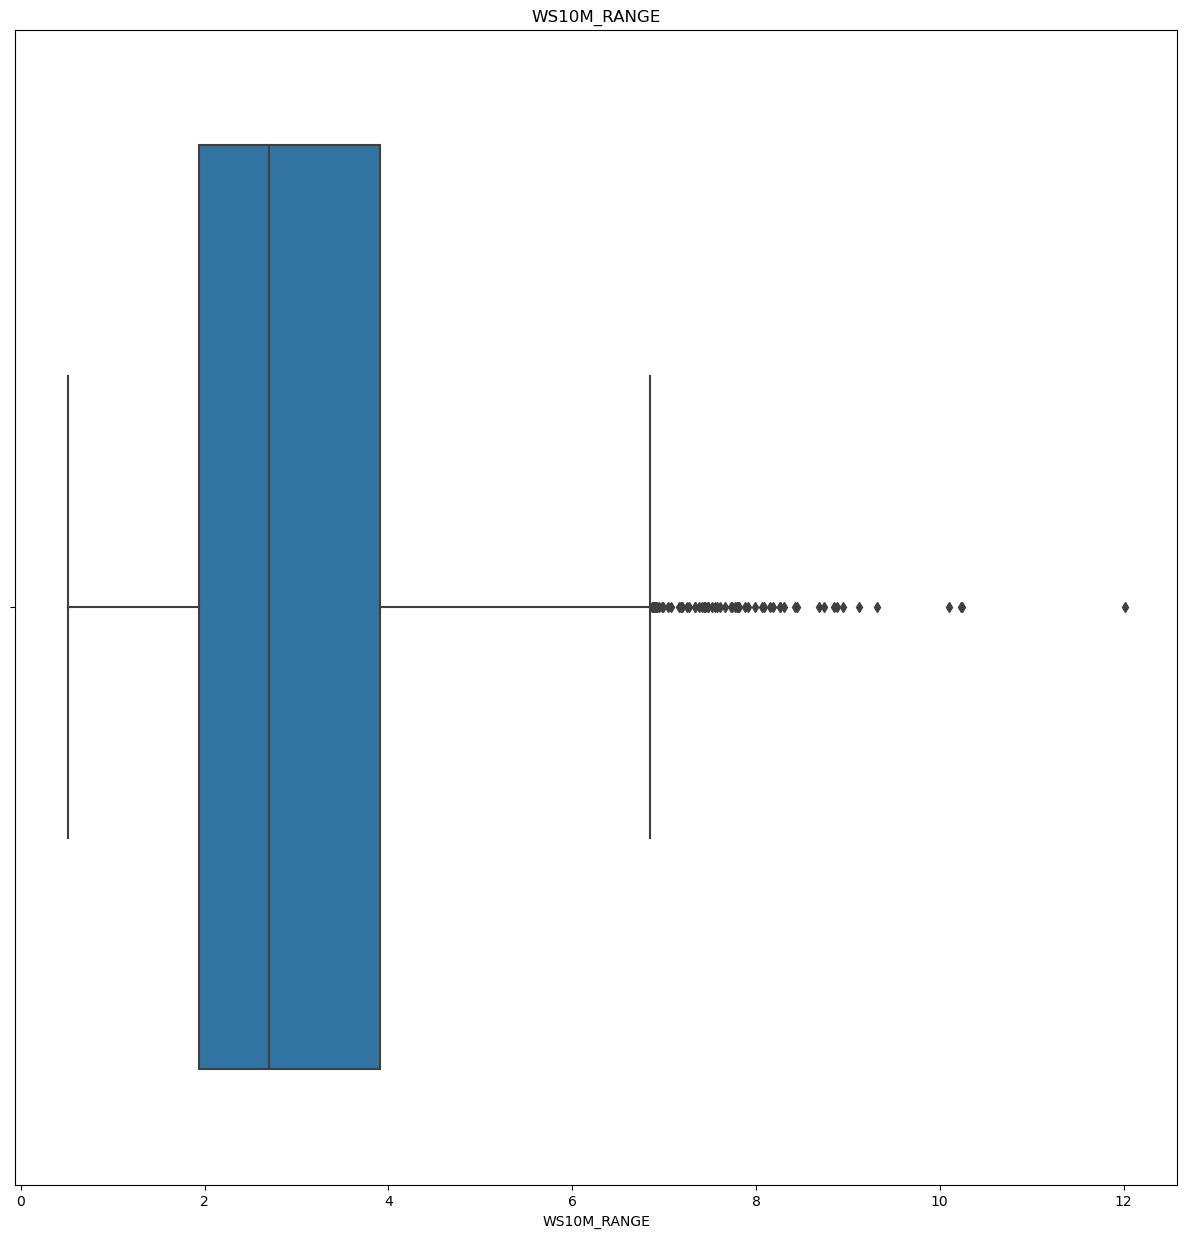

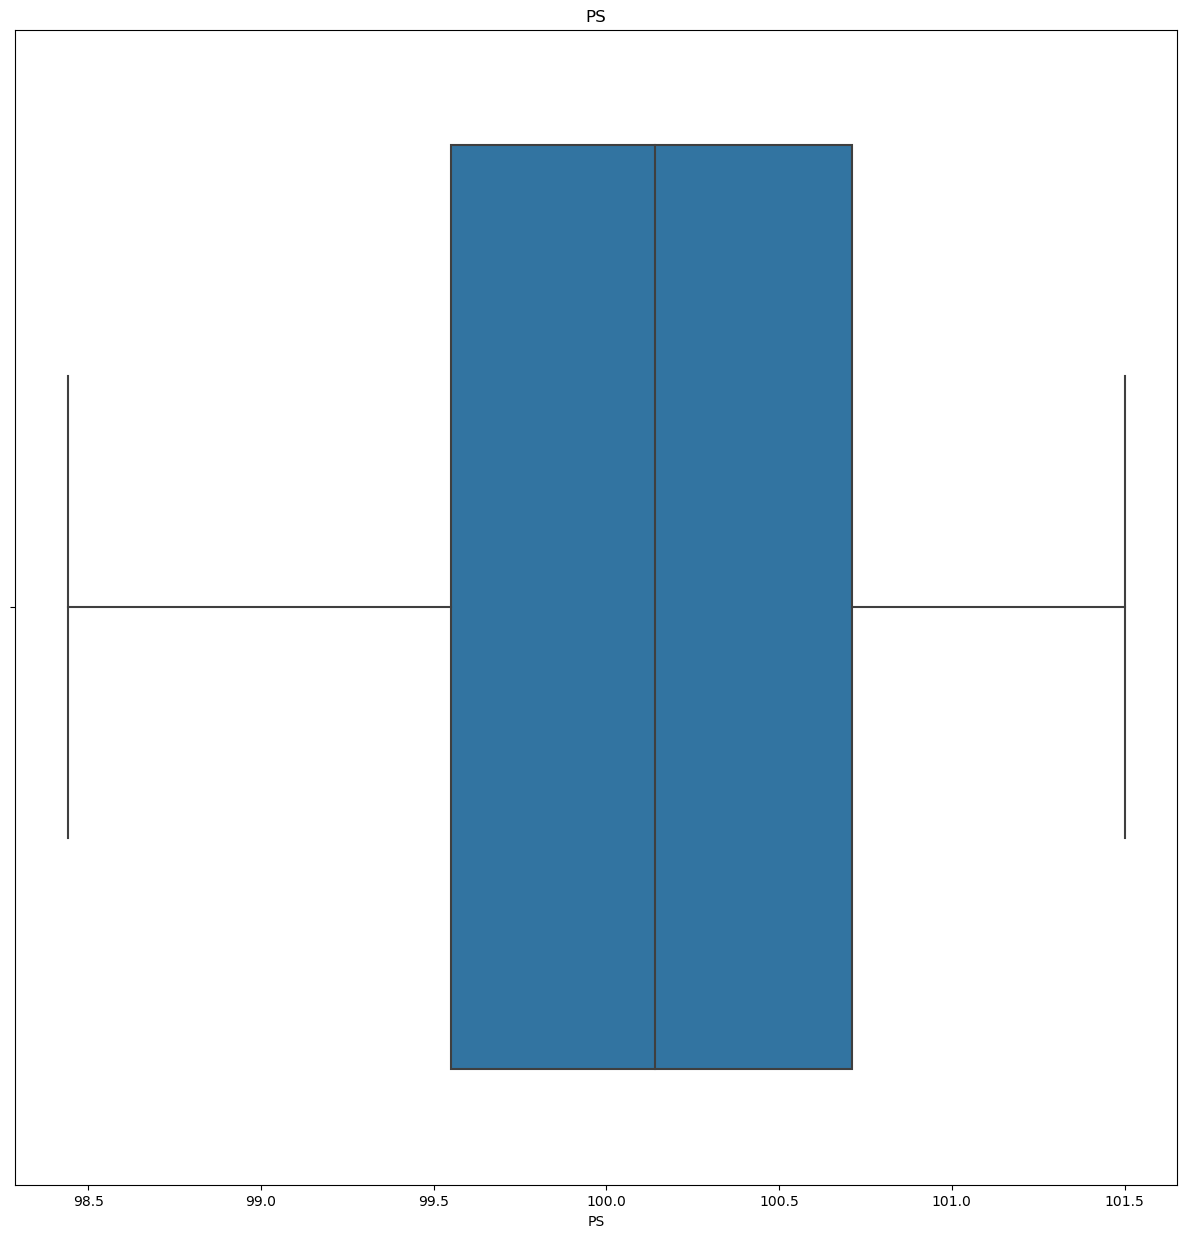

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS2M"].unique()))


[16.72 13.75 13.37 ... 25.46 27.79 26.46]
<class 'numpy.ndarray'>
[1.390e+00 0.000e+00 3.000e-02 6.000e-02 1.500e-01 1.000e-02 4.500e-01
 6.500e-01 4.960e+00 1.160e+00 2.700e-01 7.000e-02 8.800e-01 4.000e-02
 1.000e-01 5.000e-02 1.110e+00 5.490e+00 2.450e+00 9.000e-02 1.890e+00
 2.200e-01 1.400e-01 1.100e-01 2.000e-02 8.200e-01 1.554e+01 1.388e+01
 1.080e+00 3.690e+00 1.300e-01 5.500e-01 2.280e+00 5.200e-01 1.380e+00
 1.900e-01 1.210e+00 1.300e+00 2.000e-01 1.030e+00 4.620e+00 6.330e+00
 1.580e+00 2.894e+01 1.489e+01 4.700e-01 1.067e+01 9.800e-01 2.100e-01
 7.400e-01 7.360e+00 3.090e+00 1.990e+00 1.600e-01 7.700e-01 1.709e+01
 7.160e+00 2.820e+00 4.740e+00 1.142e+01 3.385e+01 5.264e+01 2.807e+01
 4.600e-01 6.000e-01 4.350e+00 3.280e+00 1.033e+01 5.880e+00 1.868e+01
 6.398e+01 4.106e+01 1.165e+01 1.369e+01 6.290e+00 1.170e+00 8.700e-01
 6.300e-01 1.270e+00 9.700e-01 1.960e+00 2.290e+00 1.250e+00 5.700e-01
 1.700e-01 1.470e+00 5.140e+00 3.721e+01 2.498e+01 4.400e+00 2.070e+00
 6.100e-01 

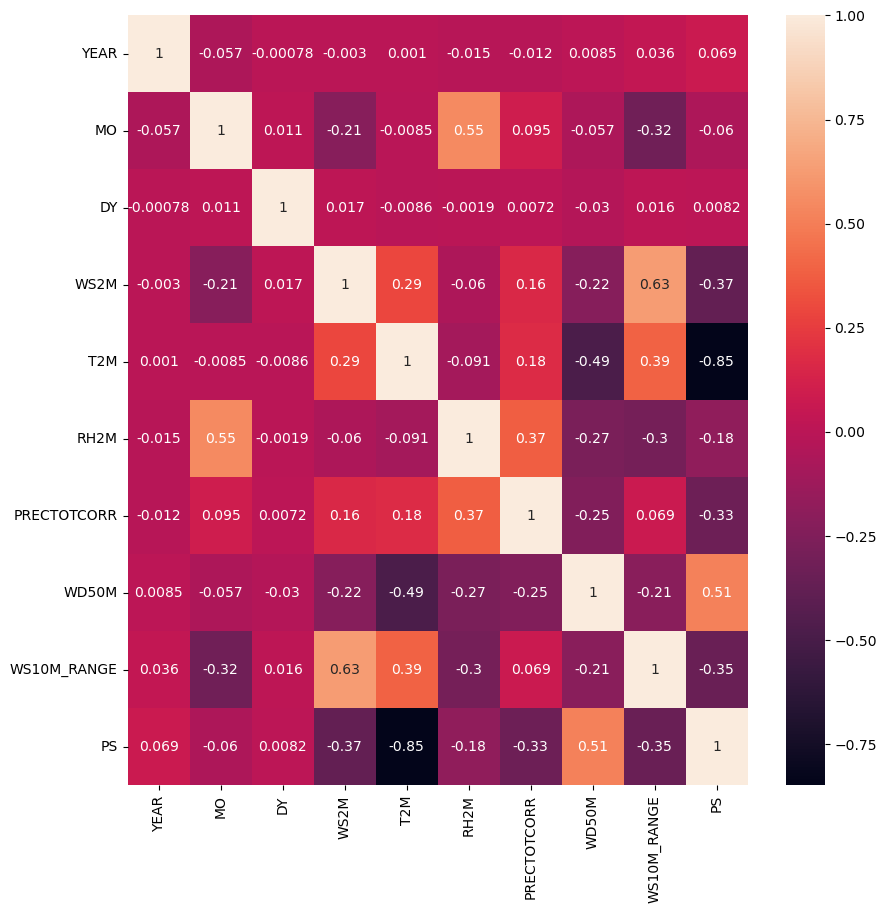

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


WS2M


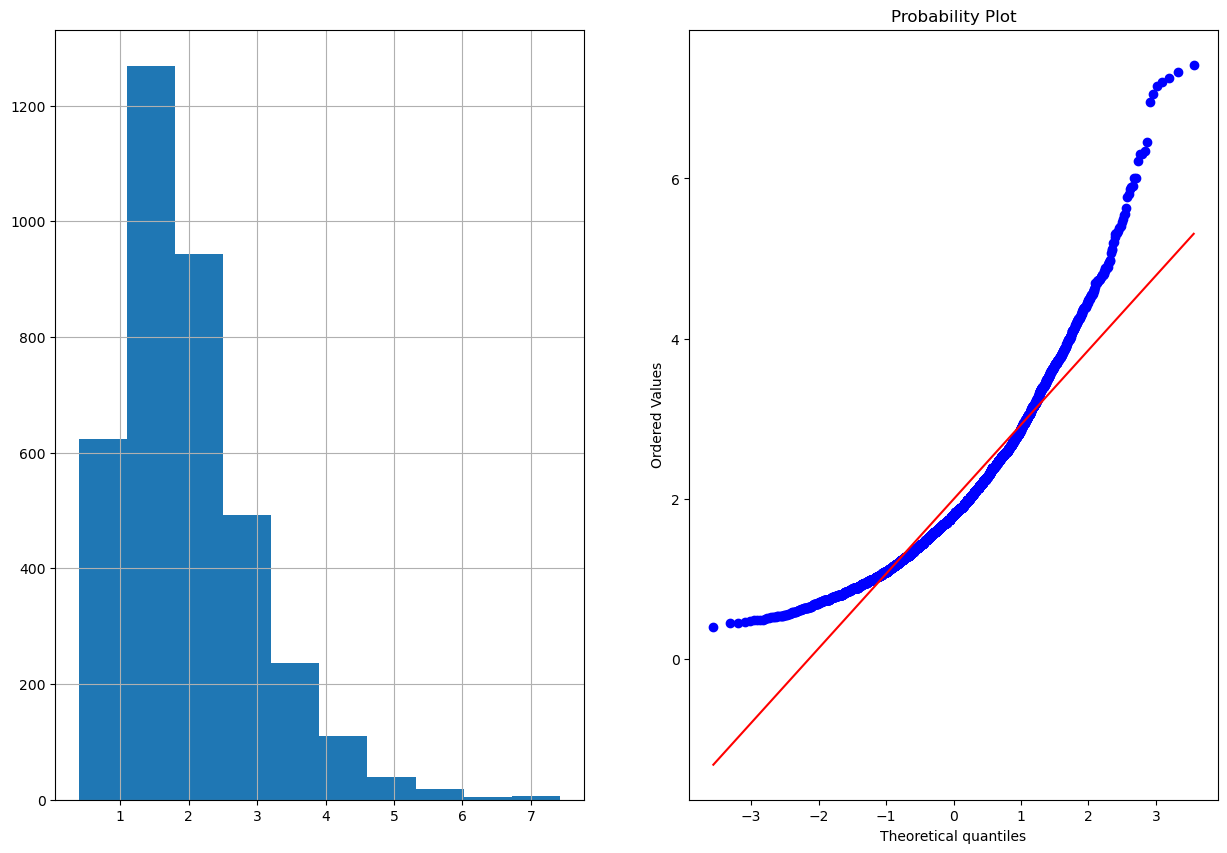

T2M


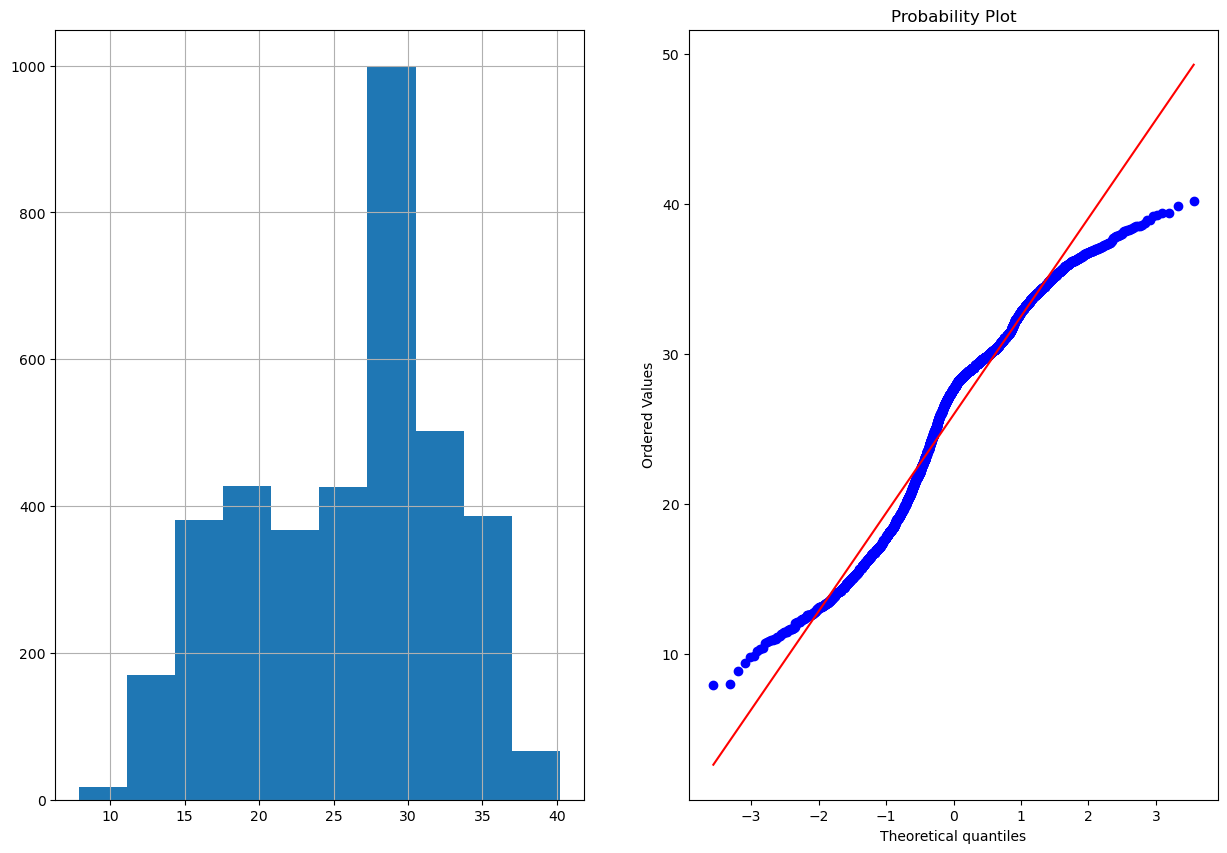

RH2M


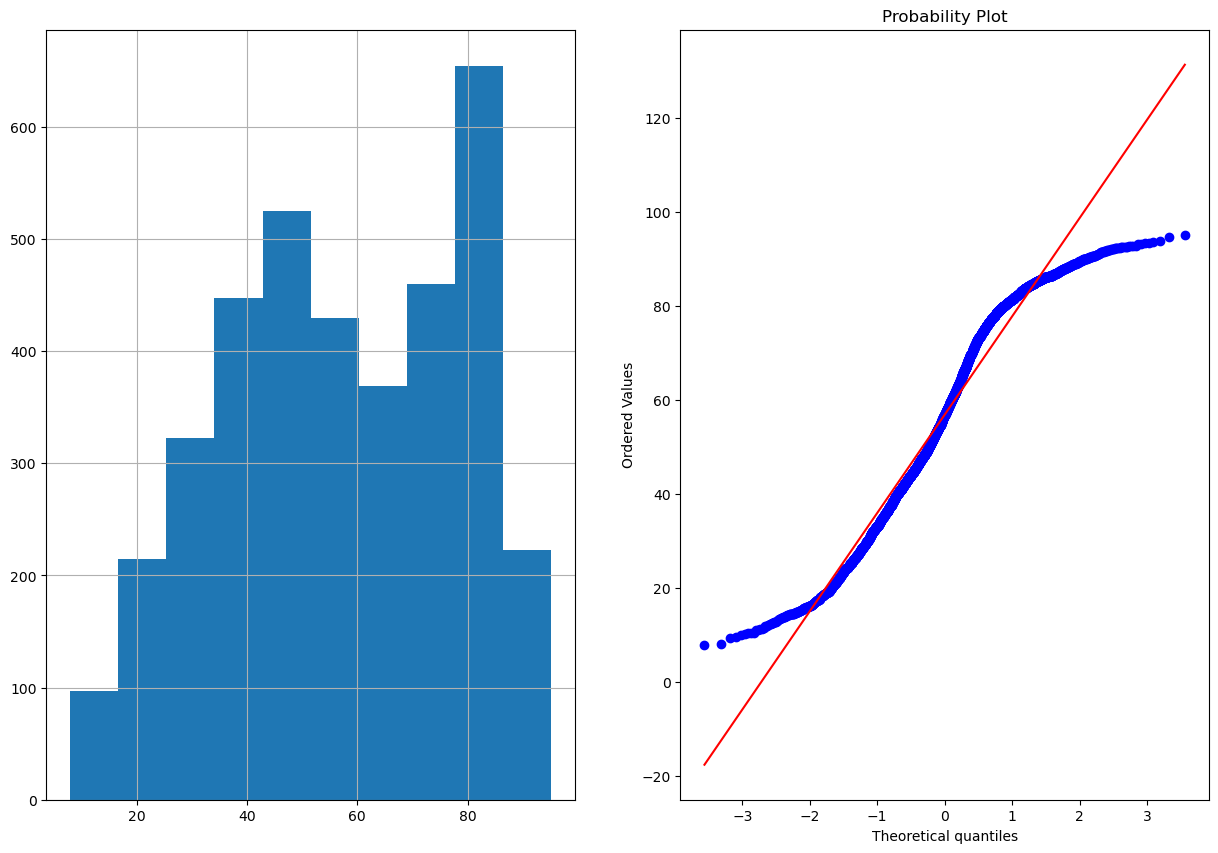

PRECTOTCORR


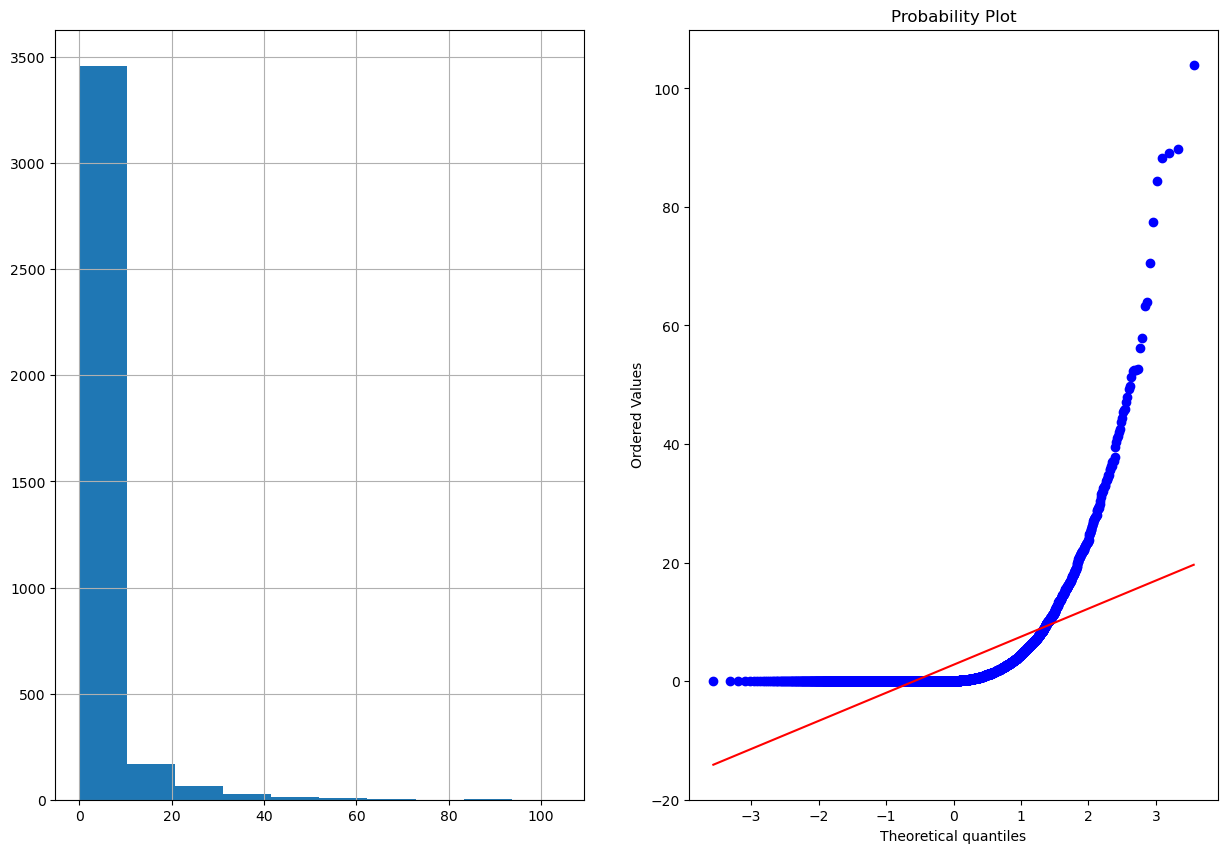

WD50M


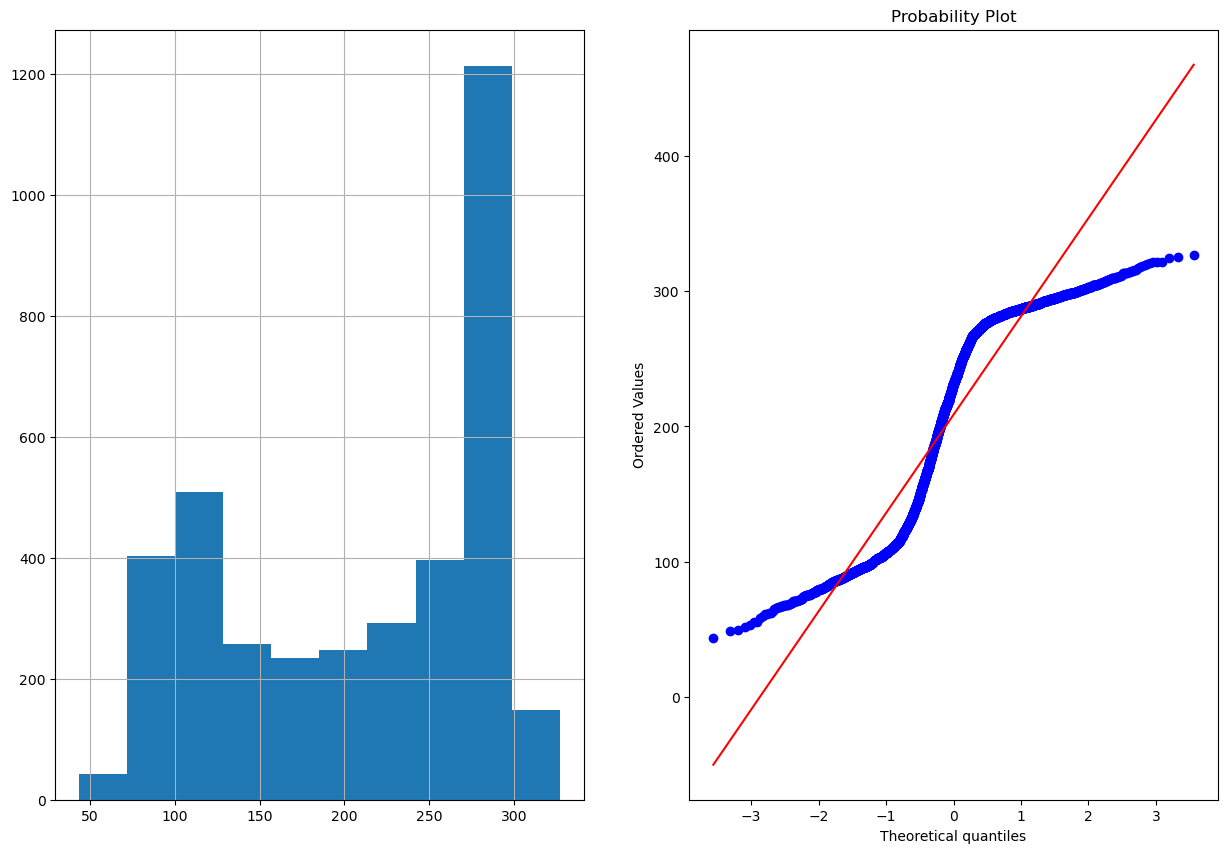

WS10M_RANGE


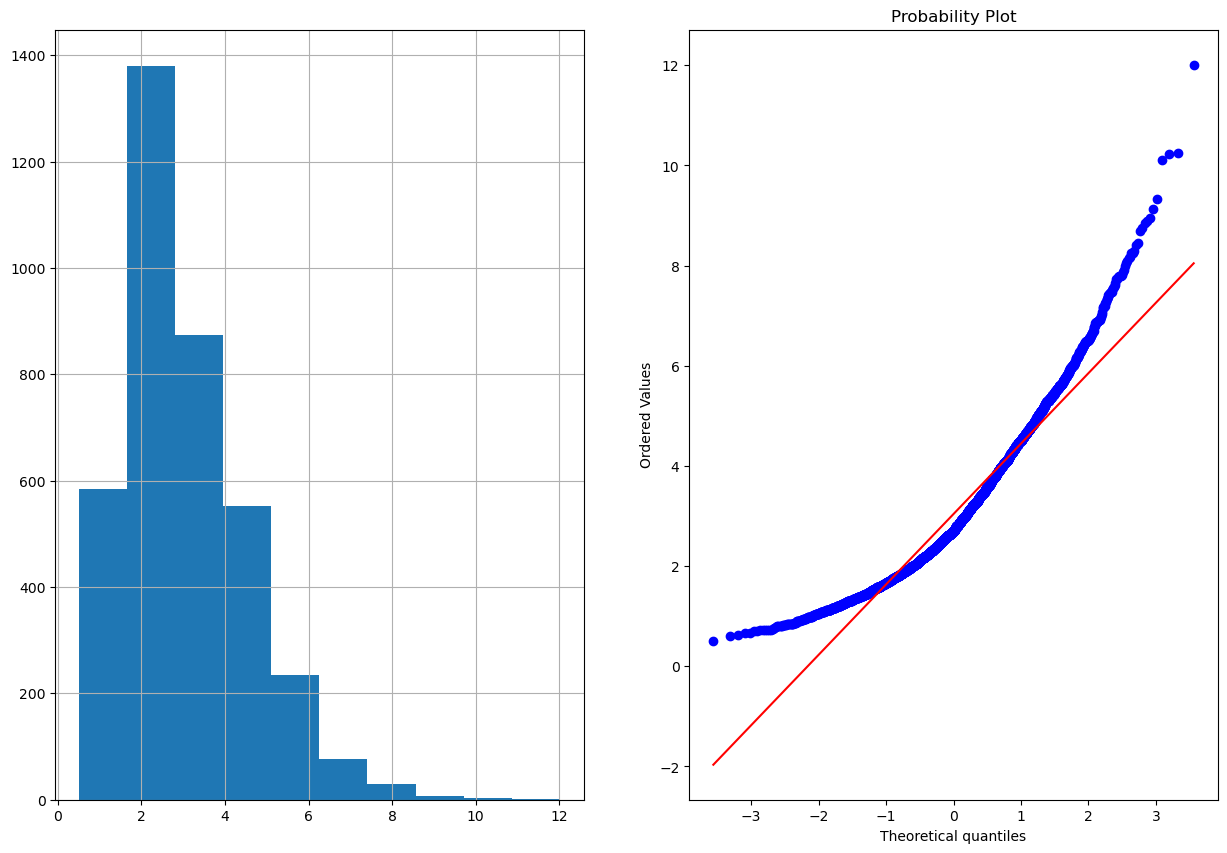

PS


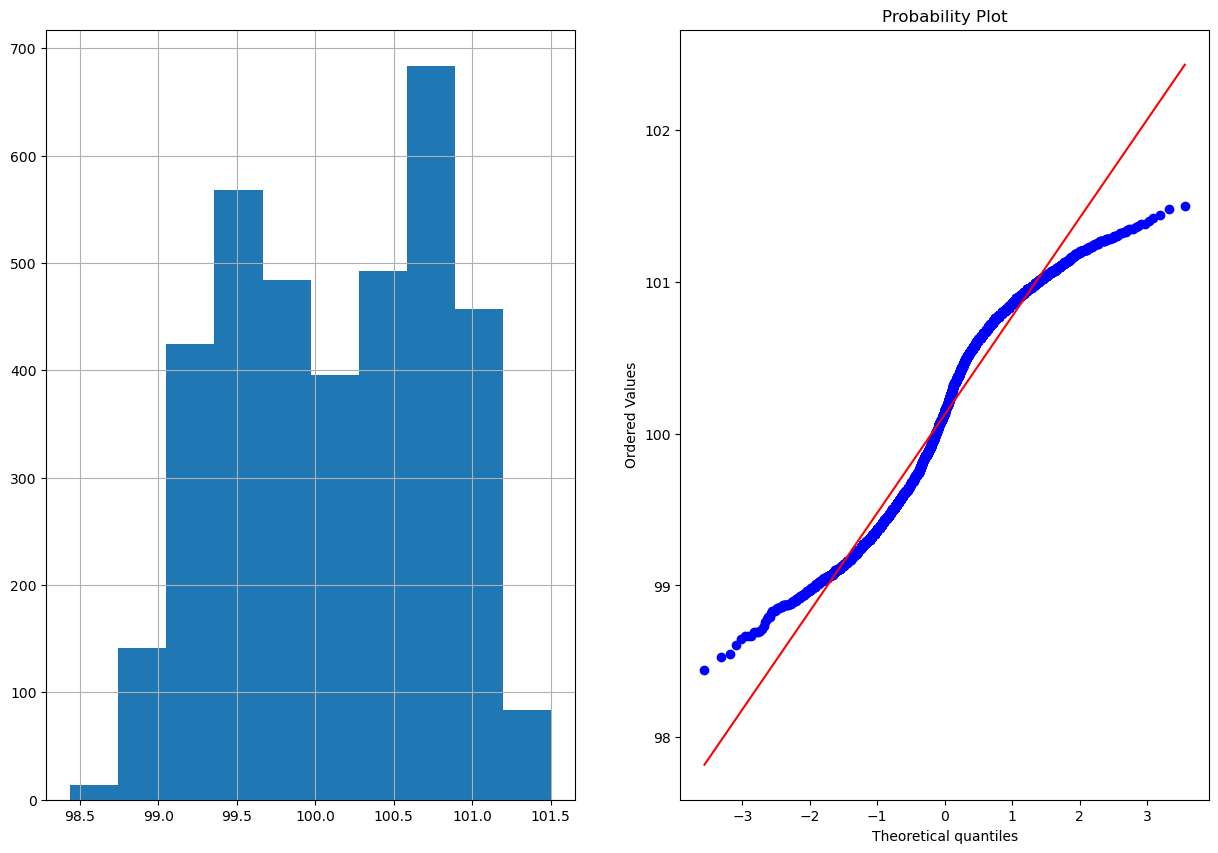

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([1.390e+00, 0.000e+00, 3.000e-02, 6.000e-02, 1.500e-01, 1.000e-02,
       4.500e-01, 6.500e-01, 4.960e+00, 1.160e+00, 2.700e-01, 7.000e-02,
       8.800e-01, 4.000e-02, 1.000e-01, 5.000e-02, 1.110e+00, 5.490e+00,
       2.450e+00, 9.000e-02, 1.890e+00, 2.200e-01, 1.400e-01, 1.100e-01,
       2.000e-02, 8.200e-01, 1.554e+01, 1.388e+01, 1.080e+00, 3.690e+00,
       1.300e-01, 5.500e-01, 2.280e+00, 5.200e-01, 1.380e+00, 1.900e-01,
       1.210e+00, 1.300e+00, 2.000e-01, 1.030e+00, 4.620e+00, 6.330e+00,
       1.580e+00, 2.894e+01, 1.489e+01, 4.700e-01, 1.067e+01, 9.800e-01,
       2.100e-01, 7.400e-01, 7.360e+00, 3.090e+00, 1.990e+00, 1.600e-01,
       7.700e-01, 1.709e+01, 7.160e+00, 2.820e+00, 4.740e+00, 1.142e+01,
       3.385e+01, 5.264e+01, 2.807e+01, 4.600e-01, 6.000e-01, 4.350e+00,
       3.280e+00, 1.033e+01, 5.880e+00, 1.868e+01, 6.398e+01, 4.106e+01,
       1.165e+01, 1.369e+01, 6.290e+00, 1.170e+00, 8.700e-01, 6.300e-01,
       1.270e+00, 9.700e-01, 1.960e+00, 2.290e+00, 

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([0., 1.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,16.72,0.0
1,13.75,1.0
2,13.37,1.0
3,12.09,1.0
4,11.75,1.0
...,...,...
3738,28.35,1.0
3739,30.44,1.0
3740,31.23,1.0
3741,31.40,0.0


In [24]:
d7=d['DY']

In [25]:
d8=d['MO']

In [26]:
d9=d['YEAR']

In [27]:
d10 = pd.concat([d4, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,DY
0,16.72,0.0,1
1,13.75,1.0,2
2,13.37,1.0,3
3,12.09,1.0,4
4,11.75,1.0,5
...,...,...,...
3738,28.35,1.0,27
3739,30.44,1.0,28
3740,31.23,1.0,29
3741,31.40,0.0,30


In [28]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,DY,MO
0,16.72,0.0,1,1
1,13.75,1.0,2,1
2,13.37,1.0,3,1
3,12.09,1.0,4,1
4,11.75,1.0,5,1
...,...,...,...,...
3738,28.35,1.0,27,3
3739,30.44,1.0,28,3
3740,31.23,1.0,29,3
3741,31.40,0.0,30,3


In [29]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,DY,MO,YEAR
0,16.72,0.0,1,1,2011
1,13.75,1.0,2,1,2011
2,13.37,1.0,3,1,2011
3,12.09,1.0,4,1,2011
4,11.75,1.0,5,1,2011
...,...,...,...,...,...
3738,28.35,1.0,27,3,2021
3739,30.44,1.0,28,3,2021
3740,31.23,1.0,29,3,2021
3741,31.40,0.0,30,3,2021


In [30]:
d12

,T2M,PRECTOTCORR,DY,MO,YEAR
0,16.72,0.0,1,1,2011
1,13.75,1.0,2,1,2011
2,13.37,1.0,3,1,2011
3,12.09,1.0,4,1,2011
4,11.75,1.0,5,1,2011
...,...,...,...,...,...
3738,28.35,1.0,27,3,2021
3739,30.44,1.0,28,3,2021
3740,31.23,1.0,29,3,2021
3741,31.40,0.0,30,3,2021


In [31]:
d12['PRECTOTCORR'].unique()

array([0., 1.])

In [32]:
d13=d['RH2M'].copy()

In [33]:
d14=d['WD50M'].copy()

In [34]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M
0,16.72,0.0,1,1,2011,69.88
1,13.75,1.0,2,1,2011,58.38
2,13.37,1.0,3,1,2011,59.62
3,12.09,1.0,4,1,2011,60.00
4,11.75,1.0,5,1,2011,64.81
...,...,...,...,...,...,...
3738,28.35,1.0,27,3,2021,17.38
3739,30.44,1.0,28,3,2021,16.25
3740,31.23,1.0,29,3,2021,17.19
3741,31.40,0.0,30,3,2021,19.31


In [35]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M
0,16.72,0.0,1,1,2011,69.88,226.94
1,13.75,1.0,2,1,2011,58.38,286.38
2,13.37,1.0,3,1,2011,59.62,304.88
3,12.09,1.0,4,1,2011,60.00,292.31
4,11.75,1.0,5,1,2011,64.81,286.94
...,...,...,...,...,...,...,...
3738,28.35,1.0,27,3,2021,17.38,277.00
3739,30.44,1.0,28,3,2021,16.25,258.19
3740,31.23,1.0,29,3,2021,17.19,178.56
3741,31.40,0.0,30,3,2021,19.31,245.12


In [36]:
d17=d['WS2M'].copy()

In [37]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,16.72,0.0,1,1,2011,69.88,226.94,2.27
1,13.75,1.0,2,1,2011,58.38,286.38,2.05
2,13.37,1.0,3,1,2011,59.62,304.88,1.44
3,12.09,1.0,4,1,2011,60.00,292.31,2.03
4,11.75,1.0,5,1,2011,64.81,286.94,1.85
...,...,...,...,...,...,...,...,...
3738,28.35,1.0,27,3,2021,17.38,277.00,1.96
3739,30.44,1.0,28,3,2021,16.25,258.19,1.59
3740,31.23,1.0,29,3,2021,17.19,178.56,1.53
3741,31.40,0.0,30,3,2021,19.31,245.12,2.02


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

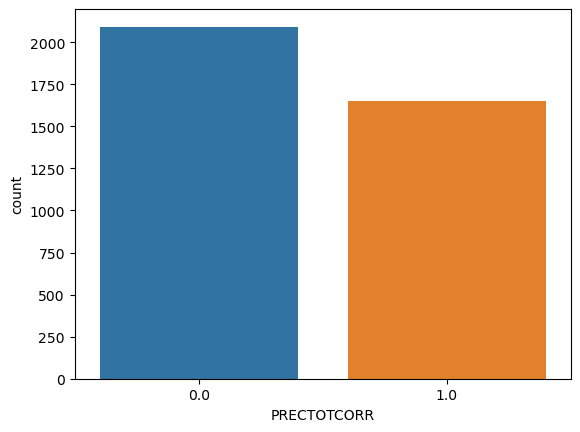

In [38]:
sns.countplot(d18["PRECTOTCORR"])

In [39]:
d18.to_csv("Darbhanga-1.csv")

In [40]:
d18

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,16.72,0.0,1,1,2011,69.88,226.94,2.27
1,13.75,1.0,2,1,2011,58.38,286.38,2.05
2,13.37,1.0,3,1,2011,59.62,304.88,1.44
3,12.09,1.0,4,1,2011,60.00,292.31,2.03
4,11.75,1.0,5,1,2011,64.81,286.94,1.85
...,...,...,...,...,...,...,...,...
3738,28.35,1.0,27,3,2021,17.38,277.00,1.96
3739,30.44,1.0,28,3,2021,16.25,258.19,1.59
3740,31.23,1.0,29,3,2021,17.19,178.56,1.53
3741,31.40,0.0,30,3,2021,19.31,245.12,2.02
